In [1]:
# .. and they went into the ARC in threes..
# arc problem 36d67576

In [2]:
%matplotlib inline
import sys
import os

# imports from other file.
import json
import numpy as np
import re

import numpy as np
import matplotlib.pyplot as plt

# https://scikit-image.org/docs/stable/user_guide/getting_started.html
import skimage
from skimage.transform import matrix_transform, SimilarityTransform, rotate, AffineTransform
from skimage.morphology import rectangle, flood_fill

# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.insert(0, '/home/sjeffery/Documents/arc/ARC/src')
print (sys.path)
import manual_solve as arc

['/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/Documents/arc/ARC/data', '/home/sjeffery/anaconda3/lib/python37.zip', '/home/sjeffery/anaconda3/lib/python3.7', '/home/sjeffery/anaconda3/lib/python3.7/lib-dynload', '', '/home/sjeffery/anaconda3/lib/python3.7/site-packages', '/home/sjeffery/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/sjeffery/.ipython']


In [3]:
# Utility fn for file reading only.

def read_arc(data):
    # Extract the train/test input/output grids. Each grid will be a
    # list of lists of ints. We convert to Numpy.
    train_input = [np.array(data['train'][i]['input']) for i in range(len(data['train']))]
    train_output = [np.array(data['train'][i]['output']) for i in range(len(data['train']))]
    test_input = [np.array(data['test'][i]['input']) for i in range(len(data['test']))]
    test_output = [np.array(data['test'][i]['output']) for i in range(len(data['test']))]

    return (train_input, train_output, test_input, test_output)

In [4]:
PATH = r'/home/sjeffery/Documents/arc/ARC/data/training/'
%cd /home/sjeffery/Documents/arc/ARC/data/training/
arc_file = '36d67576.json'

/home/sjeffery/Documents/arc/ARC/data/training


In [5]:
ID = '36d67576'
# directory = os.path.join("..", "data", "training")
json_filename = os.path.join(PATH, ID + ".json")
data = arc.read_ARC_JSON(json_filename)

train_input, train_output, test_input, test_output = data

In [6]:
test_input[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0],
       [0, 0, 4, 0, 4, 3, 0, 0, 0, 0, 4, 0, 4, 0, 0],
       [0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 4, 4, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 4, 0, 0, 0, 0, 0, 2, 4, 4, 0, 0, 0, 0],
       [0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0],
       [0, 2, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

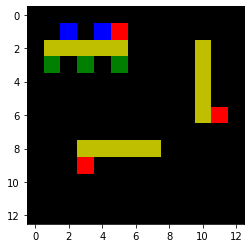

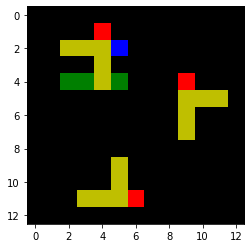

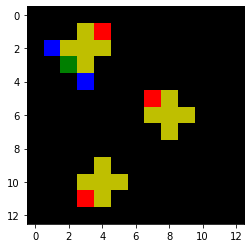

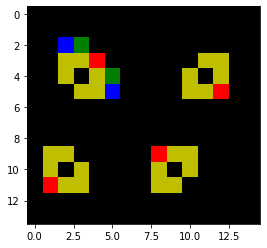

In [7]:
# Set the colors for the color map and plot the grid.

from matplotlib import colors
cmap = colors.ListedColormap(['k','b','r','g','y'])

def plot_array (A):
    
    if len(A) == 1:
        plt.figure()
        plt.imshow(A, cmap = cmap)
    
    else:
        for t_ in range (len(A)):
            plt.figure(t_)
            plt.imshow(A[t_], cmap = cmap)
        
plot_array (train_input)

plt.figure()
plt.imshow(test_input[0], cmap = cmap)

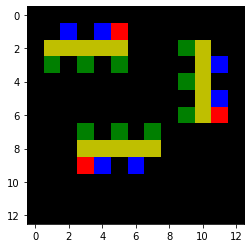

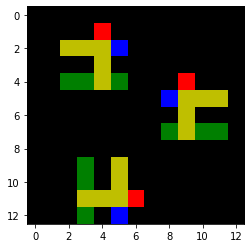

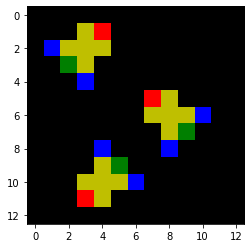

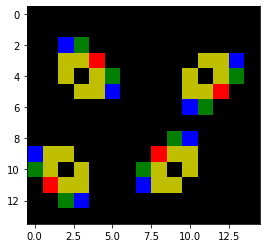

In [8]:
plot_array(train_output)

plt.figure()
plt.imshow(test_output[0], cmap = cmap)

# Run Code to here to import the data arrays.

In [139]:
# test for similarity transform.

tform_translate = SimilarityTransform(translation=(1, 1))

In [140]:
# output is the affine transformation matrix.
tform_translate

<SimilarityTransform(matrix=
    [[ 1., -0.,  1.],
     [ 0.,  1.,  1.],
     [ 0.,  0.,  1.]]) at 0x7f70aa1e97d0>

In [141]:
# inspect the input array.
train_input[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0],
       [0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [142]:
# make an empty target array.
target = np.zeros_like(train_input[0])

In [143]:
# look at a single pattern 
pattern = train_input[0][:5,:7]
pattern

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 2, 0],
       [0, 4, 4, 4, 4, 4, 0],
       [0, 3, 0, 3, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [144]:
# Every array has a number of pixels often grouped into a shape and with colors.
# Here we  only have one shape in the training image to find.
# we want the coordinates of all the non-zero pixels.

def get_coords (A):
    """ 
    takes the array with a grid of color values.
    get coordinates(x, y), with (0,0) in top left of arrary as (row, col)
    returns array of (r,c) points and array of (x,y, color) points where color is a integer from 0 to 9.
    """
    rc_coords = np.flip(np.column_stack(np.where(A > 0)), axis = 1) # the array of points (r,c)
    rows, cols = A.shape[0], A.shape[1] # get size of the main training area
    
    n_points = rc_coords.shape[0]  # number of non zero points
    points = np.zeros((n_points, 3)) # new array to hold the tranformed points in x,y,color format
    
    for p in range(n_points):
        points[p][0] = rc_coords[p][1]  # x = col
        points[p][1] = rows -1 - rc_coords[p][0] # y = nrows - 1 - row
        points[p][2] = A[rc_coords[p][1], rc_coords[p][0]] # the color value at (x,y) = (c,r)
        print (f' {p}, ({rc_coords[p][0]}, {rc_coords[p][1]}, {A[rc_coords[p][1], rc_coords[p][0]]} )')
        
    return (rc_coords, points)

rc_coords, points = get_coords (train_input[0])
rc_coords, points

 0, (2, 1, 1 )
 1, (4, 1, 1 )
 2, (5, 1, 2 )
 3, (1, 2, 4 )
 4, (2, 2, 4 )
 5, (3, 2, 4 )
 6, (4, 2, 4 )
 7, (5, 2, 4 )
 8, (10, 2, 4 )
 9, (1, 3, 3 )
 10, (3, 3, 3 )
 11, (5, 3, 3 )
 12, (10, 3, 4 )
 13, (10, 4, 4 )
 14, (10, 5, 4 )
 15, (10, 6, 4 )
 16, (11, 6, 2 )
 17, (3, 8, 4 )
 18, (4, 8, 4 )
 19, (5, 8, 4 )
 20, (6, 8, 4 )
 21, (7, 8, 4 )
 22, (3, 9, 2 )


(array([[ 2,  1],
        [ 4,  1],
        [ 5,  1],
        [ 1,  2],
        [ 2,  2],
        [ 3,  2],
        [ 4,  2],
        [ 5,  2],
        [10,  2],
        [ 1,  3],
        [ 3,  3],
        [ 5,  3],
        [10,  3],
        [10,  4],
        [10,  5],
        [10,  6],
        [11,  6],
        [ 3,  8],
        [ 4,  8],
        [ 5,  8],
        [ 6,  8],
        [ 7,  8],
        [ 3,  9]]),
 array([[ 1., 10.,  1.],
        [ 1.,  8.,  1.],
        [ 1.,  7.,  2.],
        [ 2., 11.,  4.],
        [ 2., 10.,  4.],
        [ 2.,  9.,  4.],
        [ 2.,  8.,  4.],
        [ 2.,  7.,  4.],
        [ 2.,  2.,  4.],
        [ 3., 11.,  3.],
        [ 3.,  9.,  3.],
        [ 3.,  7.,  3.],
        [ 3.,  2.,  4.],
        [ 4.,  2.,  4.],
        [ 5.,  2.,  4.],
        [ 6.,  2.,  4.],
        [ 6.,  1.,  2.],
        [ 8.,  9.,  4.],
        [ 8.,  8.,  4.],
        [ 8.,  7.,  4.],
        [ 8.,  6.,  4.],
        [ 8.,  5.,  4.],
        [ 9.,  9.,  2.]]))

In [145]:
# this gets the coodinates of all the non-zero regions.
np.nonzero(train_input[0]>0)
#skimage.measure.label(train_input[0]) # mark the regions

(array([1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 6, 6, 8, 8, 8, 8, 8,
        9]),
 array([ 2,  4,  5,  1,  2,  3,  4,  5, 10,  1,  3,  5, 10, 10, 10, 10, 11,
         3,  4,  5,  6,  7,  3]))

In [146]:
# get_regions
# here's an array of all one color with the individual regions.
mono = (train_input[0] > 0) * np.ones_like(train_input[0])
regions, n_regions = skimage.measure.label(mono, return_num = True) # mark the regions
regions, n_regions

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 3)

In [147]:
# get the cordinates of each region.
r,c = np.nonzero(regions == 1) # region 1

In [148]:
# How many points are in each region, the largest region is the pattern.
region_coords = []
n_region_pts = []

for region in range (n_regions):
    r,c = np.nonzero(regions == region+1)
    coords = list(zip(r, c))
    region_coords.append(coords) # is a list of tuples.
    n_region_pts.append ((region+1, len (coords)))

In [149]:
n_region_pts

[(1, 11), (2, 6), (3, 6)]

In [150]:
# Sort the region sizes and get the pattern and list of other regions.
print (region_coords)
n_region_pts.sort (key = lambda x:x[1], reverse = True)
print (n_region_pts[0]) # this is the pattern region, as it is the largest group, the other regions are the target regions.
pattern_region = n_region_pts[0][0]
print (f'The pattern region is label = {pattern_region}')
pattern_coords = region_coords[pattern_region-1]

target_regions = [x for (x,_) in n_region_pts[1:]]
print (f'target regions are {target_regions}')

target_coords = {r:region_coords[r-1] for r in target_regions}

[[(1, 2), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 3), (3, 5)], [(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11)], [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 3)]]
(1, 11)
The pattern region is label = 1
target regions are [2, 3]


In [151]:
# We've the dictionary of target coordinates here.
target_coords[2]

[(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11)]

In [152]:
# identify the red points in the image and get their coordinate.
reds = (train_input[0] == 2) * np.ones_like(train_input[0])
red_regions = skimage.measure.label(reds) # mark the regions
red_regions

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [153]:
# the coordinates of the red points.
for region in range(n_regions):
    r,c = np.nonzero(red_regions == region+1)
    coords = list(zip(r, c))
    print (coords) # is a list of tuples.

[(1, 5)]
[(6, 11)]
[(9, 3)]


In [154]:
type (coords)

list

In [155]:
# We have already identified the pattern coordinates.
pattern_coords

[(1, 2),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 3),
 (3, 5)]

In [156]:
# lets put the colors back with these coordinates.
color_pattern = [(coord, train_input[0][coord[0], coord[1]]) for coord in pattern_coords]
color_pattern

[((1, 2), 1),
 ((1, 4), 1),
 ((1, 5), 2),
 ((2, 1), 4),
 ((2, 2), 4),
 ((2, 3), 4),
 ((2, 4), 4),
 ((2, 5), 4),
 ((3, 1), 3),
 ((3, 3), 3),
 ((3, 5), 3)]

In [157]:
# we want a list of lists to pas to the transform function.
pattern_pts = [[coord[0], coord[1]] for coord in pattern_coords]
pattern_pts

[[1, 2],
 [1, 4],
 [1, 5],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 1],
 [3, 3],
 [3, 5]]

## here's the input of the pattern points to the transfer functions, we are always tranforming the pattern.

In [158]:
# https://scikit-image.org/docs/0.13.x/auto_examples/xx_applications/plot_geometric.html
# here we apply the transform to the first point.
tform_translate(pattern_pts[0])

array([[2., 3.]])

In [159]:
import math
# https://scikit-image.org/docs/0.13.x/api/skimage.transform.html?highlight=rotate#skimage.transform.SimilarityTransform

def tform (P, xt=0, yt=0, rotn = 0, matrix = None):
    """
    transform the point with translation xt, yt and rotation, counter clockwise in rads.
    so math.pi/2 is the 90 deg rotation. if you join translate and rotate it rotates first.
    returns the transformed coordinate
    
    >>> P1 = tform(pattern_pts[0], 1, 1, 0)
    array([[2., 3.]])
    
    >>> mirror = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    >>> P2 = tform(P1, 1, 1, 0, matrix = mirror)
    array([[3., 4.]])
    
    >>> P3 = tform(P1, 0, 0, math.pi/2, 0)
    array([[-3.,  2.]])
    
    """
    tform_translate = SimilarityTransform(translation=(xt, yt), rotation = rotn)
    return tform_translate(P)


# Testing only.

P1 = tform(pattern_pts[0], 1, 1, 0)
# P2 = tform(P1, 0, 0, math.pi/2)
mirror = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
# rot is a reflection in the origin, note that non of the examples have points on the origin.

P2 = tform(P1, 1, 1, 0, matrix = mirror)

P3 = tform(P1, 0, 0, math.pi/2, 0)


P1, P2, P3

(array([[2., 3.]]), array([[3., 4.]]), array([[-3.,  2.]]))

In [160]:
# test for the reflection transformation

tform_reflect = AffineTransform(matrix = mirror) # is reflecting about the y-axis
tform_reflect(P1)

array([[-2.,  3.]])

## Now we've the main coordinate systems for the training array, we can extract the pattern shape and apply the functions to it.

In [161]:
# make the array of just the pattern region, we will transform this to try to match the targets.
pattern = train_input[0] * (regions == pattern_region)
pattern

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [162]:
pattern_red = [(np.where (pattern == 2))[0][0], (np.where (pattern == 2))[1][0]]
pattern_red

[1, 5]

In [163]:
# Make the target arrays for each target region. We are aiming to translate the pattern to these targets.
targ = []
for target_region in target_regions:
    # print (target_region)
    targ.append(train_input[0] * (regions == target_region))

targets = dict(zip(target_regions, targ))
targets[2] # s the array of the dictionary of arrays of each target array by label for target_regions

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [164]:
targets[2], targets[3]
# these are the target shapes for the transformations

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 

In [165]:
def scores (target_region, transformed_pts):
    target_score = n_reg_pts[target_region]
    intersection = len(set([(x,y) for [x,y] in transformed_pts]).intersection(set(target_coords[target_region])))
    # print (intersection, target_score)
    score = (target_score - intersection)
    return score  # a score of 1.0 is a match.

scores (2, target_coords[2])

0

In [236]:
for target_region in target_regions:
    print (target_coords[target_region], np.shape(target_regions), np.shape((targets, np.where (targets[target_region] == 2))))

[(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11)] (2,) (2,)
[(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 3)] (2,) (2,)


## get_tranform_xy (p_red):
<p> The function takes a red point of the pattern and looks to tranform it to the target red point. it return the tx, ty for the transform.

In [237]:
# get the red points for the targets and the two transformations (target - pattern)

def get_transform_xy (p_red):
    targets_trfm = []
    for target_region in target_regions:
        print (target_coords[target_region], np.shape(target_regions), np.shape((targets, np.where (targets[target_region] == 2))))
        reds = [(np.where (targets[target_region] == 2))[0][0], (np.where (targets[target_region] == 2))[1][0]] # color 2 = red.
        tx = reds[0] - p_red[0]
        ty = reds[1] - p_red[1]
        trfm = [tx,ty]    
        targets_trfm.append(trfm)
        
    return targets_trfm

targets_trfm = get_transform_xy (pattern_red)
targets_trfm

[(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11)] (2,) (2,)
[(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 3)] (2,) (2,)


[[5, 6], [8, -2]]

In [168]:
get_transform_xy ([1,5])

[[5, 6], [8, -2]]

In [169]:
target_regions, n_regions

([2, 3], 3)

## This is start of the loop for the target region = 2. for pattern = region 1, target regions 0 and 1 to n_regions

In [170]:
# now we can tranform the pattern red points to the target red points.

# make some translate functions.
# for the first target from target_regions.
all_scores = {} # dict for the 8 possible function scores 
target_grid = {} # dict of target_region: array of final points.

In [193]:
# This is the main loop 

target_region = 3 # for regions labeled from 1 with 1 = pattern so first target = 2 loop target_region in target_regions

target_n = target_region - 2 # first target region, matched to target_region
n_reg_pts = dict(n_region_pts) # gets a dict of {region : n_pts} for the target function.
# target_region  target_n + 2 # for regions labeled from 1 with 1 = pattern so first target = 2

tx, ty = targets_trfm [target_n][0], targets_trfm [target_n][1]

def t1 (points, tx, ty):
      return tform(points ,tx , ty, 0) # transform only, P1 by tx, ty

pt1 = t1(pattern_pts, targets_trfm[target_n][0], targets_trfm[target_n][1])
all_scores.update({'pt1': scores(target_region, pt1)})

# t2 = [tform_reflect(pt) for pt in pattern_pts]
def t2 (points):
    """
    reflection followed by transformation of the pattern points.
    returns transformed points.
    """ 
    pt_red = tform (tform_reflect(tform(pattern_red))) # completes a reflection of the red point.
    tx, ty = get_transform_xy(pt_red[0])[target_n] # for the target_n target region.
    print (f' deltas = {tx}, {ty}')
        
    pt2 = t1 (tform_reflect(tform(points)), tx, ty ) # completes a reflection of all pattern
    
    print (pattern_red, pt_red, pt2)
       
    return [(round(x),round(y)) for [x,y] in pt2]
    
    
# reflect and transform with the tranform from the reflected red point to the target.
pt2 = t2(pattern_pts)

print (f'target_region = {target_region}')
print (f'pt2 score = {scores(target_region, pt2)}')  # for pt2 (reflect and translate
all_scores.update({'pt2': scores(target_region, pt2)})

 deltas = 10.0, -2.0
[1, 5] [[-1.  5.]] [[ 9.  0.]
 [ 9.  2.]
 [ 9.  3.]
 [ 8. -1.]
 [ 8.  0.]
 [ 8.  1.]
 [ 8.  2.]
 [ 8.  3.]
 [ 7. -1.]
 [ 7.  1.]
 [ 7.  3.]]
target_region = 3
pt2 score = 4


In [194]:
# testing 
# target_region = 3 # for regions labeled from 1 with 1 = pattern so first target = 2 loop target_region in target_regions

target_n = target_region - 2 # first target region, matched to target_region
n_reg_pts = dict(n_region_pts) # gets a dict of {region : n_pts} for the target function.
target_region = target_n + 2 # for regions labeled from 1 with 1 = pattern so first target = 2

tx, ty = targets_trfm [target_n][0], targets_trfm [target_n][1]
tx, ty

(8, -2)

In [195]:
# testing
pt_red, target_n
get_transform_xy(pt_red[0])[0]

[1.0, 12.0]

In [196]:
# manually checked this transformation. PASS
tform_reflect(tform(pattern_pts))  # this is a reflection in the xaxis.

array([[-1.,  2.],
       [-1.,  4.],
       [-1.,  5.],
       [-2.,  1.],
       [-2.,  2.],
       [-2.,  3.],
       [-2.,  4.],
       [-2.,  5.],
       [-3.,  1.],
       [-3.,  3.],
       [-3.,  5.]])

In [197]:
type(pt2), type(target_region)

(list, int)

In [198]:
def t3 (points, rads):
    """
    rotation followed by translation of the pattern points.
    returns transformed points.
    rot, rotation is rad counter clockwise.
    """
    pt_red = tform(pattern_red, 0, 0, rads) # completes a rotation of the red point for the pattern.
    tx, ty = get_transform_xy(pt_red[0])[target_n] # get the tx, ty for the target_n target region.
    print (f' deltas = {tx}, {ty}')
        
    pt_rot = tform(points, 0, 0, rads) # completes a rotation and tranlastion by tx, ty of all pattern points
    
    pt3 = t1(pt_rot, tx, ty)
    
    print (pattern_red, pt_red)
    print (points, pt_rot, pt3)
       
    return [(round(x),round(y)) for [x,y] in pt3]

pt3 = t3 (pattern_pts, math.pi*3/2)
print (f'pt3 (270) score = {scores(target_region, pt3)}')  # for pt3 rotation and translate
all_scores.update({'pt3': scores(target_region, pt3)})

 deltas = 4.0, 4.000000000000001
[1, 5] [[ 5. -1.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[ 2. -1.]
 [ 4. -1.]
 [ 5. -1.]
 [ 1. -2.]
 [ 2. -2.]
 [ 3. -2.]
 [ 4. -2.]
 [ 5. -2.]
 [ 1. -3.]
 [ 3. -3.]
 [ 5. -3.]] [[6. 3.]
 [8. 3.]
 [9. 3.]
 [5. 2.]
 [6. 2.]
 [7. 2.]
 [8. 2.]
 [9. 2.]
 [5. 1.]
 [7. 1.]
 [9. 1.]]
pt3 (270) score = 4


In [199]:
target_coords[2]

[(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11)]

In [200]:
pt4 = t3 (pattern_pts, math.pi/2)  # for 90 deg rotation.
print (f'pt4 (90) score = {scores(target_region, pt4)}')  # for pt4 rotation and translate
all_scores.update({'pt4': scores(target_region, pt4)})

 deltas = 14.0, 1.9999999999999998
[1, 5] [[-5.  1.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[-2.  1.]
 [-4.  1.]
 [-5.  1.]
 [-1.  2.]
 [-2.  2.]
 [-3.  2.]
 [-4.  2.]
 [-5.  2.]
 [-1.  3.]
 [-3.  3.]
 [-5.  3.]] [[12.  3.]
 [10.  3.]
 [ 9.  3.]
 [13.  4.]
 [12.  4.]
 [11.  4.]
 [10.  4.]
 [ 9.  4.]
 [13.  5.]
 [11.  5.]
 [ 9.  5.]]
pt4 (90) score = 5


In [201]:
pt5 = t3 (pattern_pts, math.pi)  # for 180 deg rotation.
print (f'pt5 (90) score = {scores(target_region, pt5)}')  # for pt5 rotation and translate
all_scores.update({'pt5': scores(target_region, pt5)})

 deltas = 10.0, 8.0
[1, 5] [[-1. -5.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[-1. -2.]
 [-1. -4.]
 [-1. -5.]
 [-2. -1.]
 [-2. -2.]
 [-2. -3.]
 [-2. -4.]
 [-2. -5.]
 [-3. -1.]
 [-3. -3.]
 [-3. -5.]] [[9. 6.]
 [9. 4.]
 [9. 3.]
 [8. 7.]
 [8. 6.]
 [8. 5.]
 [8. 4.]
 [8. 3.]
 [7. 7.]
 [7. 5.]
 [7. 3.]]
pt5 (90) score = 0


In [202]:
def t4 (points, rads):
    """
    rotation & reflection followed by translation of the pattern points.
    returns transformed points.
    rot, rotation is rad counter clockwise.
    """
    pt_red = tform(pattern_red, 0, 0, rads) # completes a rotation of the red point for the pattern.
    pt_red2 = tform (tform_reflect(tform(pt_red))) # completes a reflection of the red point.
    tx, ty = get_transform_xy(pt_red2[0])[target_n] # get the tx, ty for the target_n target region.
    print (f' deltas = {tx}, {ty}')
    print (pattern_red, pt_red)
    print (f' pt_red2 point double transformed; {pt_red2}')
    
    pt_rot = tform(points, 0, 0, rads) # completes a rotation and tranlastion by tx, ty of all pattern points
    pt6 = t1 (tform_reflect(tform(pt_rot)), tx, ty ) # completes a reflection of all pattern
            
    print (points, pt_rot, pt6)
       
    return [(round(x),round(y)) for [x,y] in pt6]

pt6 = t4 (pattern_pts, math.pi*1/2)
print (f'pt6 (90) score = {scores(target_region, pt6)}')  # for pt6 rotation, reflection and translate
all_scores.update({'pt6': scores(target_region, pt6)})

 deltas = 4.0, 1.9999999999999998
[1, 5] [[-5.  1.]]
 pt_red2 point double transformed; [[5. 1.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[-2.  1.]
 [-4.  1.]
 [-5.  1.]
 [-1.  2.]
 [-2.  2.]
 [-3.  2.]
 [-4.  2.]
 [-5.  2.]
 [-1.  3.]
 [-3.  3.]
 [-5.  3.]] [[6. 3.]
 [8. 3.]
 [9. 3.]
 [5. 4.]
 [6. 4.]
 [7. 4.]
 [8. 4.]
 [9. 4.]
 [5. 5.]
 [7. 5.]
 [9. 5.]]
pt6 (90) score = 3


In [203]:
pt7 = t4 (pattern_pts, math.pi)
print (f'pt7 (180) score = {scores(target_region, pt7)}')  # for pt7 rotation, reflect and translate
all_scores.update({'pt7': scores(target_region, pt7)})

 deltas = 7.999999999999999, 8.0
[1, 5] [[-1. -5.]]
 pt_red2 point double transformed; [[ 1. -5.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[-1. -2.]
 [-1. -4.]
 [-1. -5.]
 [-2. -1.]
 [-2. -2.]
 [-2. -3.]
 [-2. -4.]
 [-2. -5.]
 [-3. -1.]
 [-3. -3.]
 [-3. -5.]] [[ 9.  6.]
 [ 9.  4.]
 [ 9.  3.]
 [10.  7.]
 [10.  6.]
 [10.  5.]
 [10.  4.]
 [10.  3.]
 [11.  7.]
 [11.  5.]
 [11.  3.]]
pt7 (180) score = 5


In [204]:
pt8 = t4 (pattern_pts, math.pi * 3/2)
print (f'pt8 (270) score = {scores(target_region, pt8)}')  # for pt8 rotation, reflect and translate
all_scores.update({'pt8': scores(target_region, pt8)})

 deltas = 14.0, 4.000000000000001
[1, 5] [[ 5. -1.]]
 pt_red2 point double transformed; [[-5. -1.]]
[[1, 2], [1, 4], [1, 5], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 1], [3, 3], [3, 5]] [[ 2. -1.]
 [ 4. -1.]
 [ 5. -1.]
 [ 1. -2.]
 [ 2. -2.]
 [ 3. -2.]
 [ 4. -2.]
 [ 5. -2.]
 [ 1. -3.]
 [ 3. -3.]
 [ 5. -3.]] [[12.  3.]
 [10.  3.]
 [ 9.  3.]
 [13.  2.]
 [12.  2.]
 [11.  2.]
 [10.  2.]
 [ 9.  2.]
 [13.  1.]
 [11.  1.]
 [ 9.  1.]]
pt8 (270) score = 5


In [205]:
# Check point transformation, manually checked function: PASS
rads = math.pi *3/2
pt_red = tform(pattern_red, 0, 0, rads) # completes a rotation of the red point for the pattern.
pt_red2 = tform (tform_reflect(tform(pt_red))) # completes a reflection of the red point.
tx, ty = get_transform_xy(pt_red2[0])[target_n] 
tx, ty

(14.0, 4.000000000000001)

In [206]:
# as p3, t3 score is zero, this function is the one to tranform the pattern to the target 2.

#np.shape(pattern), pattern
all_scores

{'pt1': 5,
 'pt2': 4,
 'pt3': 4,
 'pt4': 5,
 'pt5': 0,
 'pt6': 3,
 'pt7': 5,
 'pt8': 5}

In [207]:
# select the transform where the score = 0
select = { v:k for k,v in all_scores.items()}
select[0] # the score will always be 0 for the selected transforms.

'pt5'

In [208]:
# get the points from the selected transformation
eval(select[0])

[(9.0, 6.0),
 (9.0, 4.0),
 (9.0, 3.0),
 (8.0, 7.0),
 (8.0, 6.0),
 (8.0, 5.0),
 (8.0, 4.0),
 (8.0, 3.0),
 (7.0, 7.0),
 (7.0, 5.0),
 (7.0, 3.0)]

In [209]:
color_pattern

[((1, 2), 1),
 ((1, 4), 1),
 ((1, 5), 2),
 ((2, 1), 4),
 ((2, 2), 4),
 ((2, 3), 4),
 ((2, 4), 4),
 ((2, 5), 4),
 ((3, 1), 3),
 ((3, 3), 3),
 ((3, 5), 3)]

In [210]:
# add the colors back to the tranformed location.
target_res = [(int(t1), int(t2), c) for [(t1,t2), (z, c)] in list(zip(eval(select[0]), color_pattern))]
target_res

[(9, 6, 1),
 (9, 4, 1),
 (9, 3, 2),
 (8, 7, 4),
 (8, 6, 4),
 (8, 5, 4),
 (8, 4, 4),
 (8, 3, 4),
 (7, 7, 3),
 (7, 5, 3),
 (7, 3, 3)]

In [211]:
# open a blank grid for this target

t_grid = np.zeros_like(pattern)

# for each point, populate the array with the color given (r,c, color)
for row in target_res:
    t_grid [row[0], row[1]] = row[2]

# final_grid = final_grid.reshape((19,19))
target_grid.update ({target_region : t_grid})
target_grid[target_region]

## This is the end of the loop

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

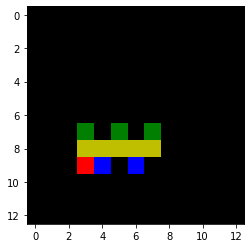

In [212]:
# check the plot with imshow

plt.figure()
plt.imshow(target_grid[target_region], cmap = cmap)


In [213]:
target_regions, target_grid

([2, 3],
 {2: array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 2, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  3: array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0,

In [214]:
#Finally put the individual target arrays back together.
# remember that we have to run all the loopos manual for each target, to build up teh dictionary of transformed grids.
# in the function this will be in the loop.

final_grid = np.zeros_like(pattern)
final_grid += pattern

for n in target_regions:
    print (n)
    final_grid += target_grid[n]

final_grid

2
3


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 4, 4, 4, 4, 0, 0, 0, 3, 4, 0, 0],
       [0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 4, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 2, 0],
       [0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

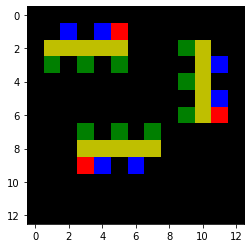

In [215]:
# check the plot with imshow

plt.figure()
plt.imshow(final_grid, cmap = cmap)


In [216]:
# Check vs Solutions

In [ ]:
plot_array(train_output)

# The Function

In [42]:
def solve_36d67576(x):

    # https://scikit-image.org/docs/stable/user_guide/getting_started.html
    import skimage
    from skimage.transform import matrix_transform, SimilarityTransform, rotate, AffineTransform
    from skimage.morphology import rectangle, flood_fill
    
    import math
    
    # https://scikit-image.org/docs/0.13.x/auto_examples/xx_applications/plot_geometric.html
    
    # https://scikit-image.org/docs/0.13.x/api/skimage.transform.html?highlight=rotate#skimage.transform.SimilarityTransform

    def scores (target_region, transformed_pts):
        """
        Calculates a score for which is the number of non-overlapping squares between the target and the transformed pattern.
        A score of zero is a perfect match, a score > the zero indicates how many points are unmatching.
        As we translate the red points on to each other the score should not always be > the (number of target points - 1)
        A score >= number of target points indicates an error in the tansformation.
        
        """
        target_score = n_reg_pts[target_region]
        intersection = len(set([(x,y) for [x,y] in transformed_pts]).intersection(set(target_coords[target_region])))
        # print (intersection, target_score)
        score = (target_score - intersection)
        return score  # a score of 0 is a match.
    
    
    # get the red points for the targets and the two transformations (target - pattern)

    def get_transform_xy (p_red):
        """
        Input the coords of a red point. Return the transformation tx, ty reququird to move the red points from the
        pattern to the target regions. Returned as a list of lists [[tx,ty],..]
        """
        
        targets_trfm = []
        for target_region in target_regions:
            # print (target_coords[target_region], np.shape(target_regions), np.shape((targets, np.where (targets[target_region] == 2))))
            # print ((targets[target_region]))
            # print (f' tx{target_region} = {(np.where (targets[target_region] == 2))[1][0]}')
            # print (f' ty{target_region} = {(np.where (targets[target_region] == 2))[1][0]}')
            reds = [(np.where (targets[target_region] == 2))[0][0], (np.where (targets[target_region] == 2))[1][0]]
            tx = reds[0] - p_red[0]
            ty = reds[1] - p_red[1]
            trfm = [tx,ty]    
            targets_trfm.append(trfm)

        return targets_trfm


    
    def tform (P, xt=0, yt=0, rotn = 0, matrix = None):
        """
        transform a point, P or an array of points, with translation xt, yt and rotation, counter clockwise in rads.
        so math.pi/2 is the 90 deg rotation. if you join translate and rotate it rotates first.
        returns the transformed coordinate

        >>> P1 = tform(pattern_pts[0], 1, 1, 0)
        array([[2., 3.]])

        >>> mirror = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
        >>> P2 = tform(P1, 1, 1, 0, matrix = mirror)
        array([[3., 4.]])

        >>> P3 = tform(P1, 0, 0, math.pi/2, 0)
        array([[-3.,  2.]])

        """
        tform_translate = SimilarityTransform(translation=(xt, yt), rotation = rotn)
        return tform_translate(P)
    
    mirror = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    tform_reflect = AffineTransform(matrix = mirror) # is reflecting about the y-axis
        

    def t1 (points, tx, ty):
        """
        Translate point or array of points by tx, ty and return the transformed point or array.
        In this probelm we always tranform pattern points.
        """
        return tform(points ,tx , ty, 0) # transform only, P1 by tx, ty


    # t2 = [tform_reflect(pt) for pt in pattern_pts]
    def t2 (points):
        """
        reflection followed by transformation of the pattern points.
        returns transformed points.
        """ 
        pt_red = tform (tform_reflect(tform(pattern_red))) # completes a reflection of the red point.
        tx, ty = get_transform_xy(pt_red[0])[target_n] # for the target_n target region.
        #print (f' deltas = {tx}, {ty}')

        pt2 = t1 (tform_reflect(tform(points)), tx, ty ) # completes a reflection of all pattern

        #print (pattern_red, pt_red, pt2)

        return [(round(x),round(y)) for [x,y] in pt2]

    
    def t3 (points, rads):
        """
        rotation followed by translation of the pattern points.
        returns transformed points.
        rot, rotation is rad counter clockwise.
        """
        pt_red = tform(pattern_red, 0, 0, rads) # completes a rotation of the red point for the pattern.
        tx, ty = get_transform_xy(pt_red[0])[target_n] # get the tx, ty for the target_n target region.
        #print (f' deltas = {tx}, {ty}')

        pt_rot = tform(points, 0, 0, rads) # completes a rotation and translation by tx, ty of all pattern points

        pt3 = t1(pt_rot, tx, ty)

        #print (pattern_red, pt_red)
        #print (points, pt_rot, pt3)

        return [(round(x),round(y)) for [x,y] in pt3]
    
    
    def t4 (points, rads):
        """
        rotation & reflection followed by translation of the pattern points.
        returns transformed points.
        rot, rotation is rad counter clockwise.
        """
        pt_red = tform(pattern_red, 0, 0, rads) # completes a rotation of the red point for the pattern.
        pt_red2 = tform (tform_reflect(tform(pt_red))) # completes a reflection of the red point.
        tx, ty = get_transform_xy(pt_red2[0])[target_n] # get the tx, ty for the target_n target region.
        #print (f' deltas = {tx}, {ty}')
        #print (pattern_red, pt_red)
        #print (f' pt_red2 point double transformed; {pt_red2}')

        pt_rot = tform(points, 0, 0, rads) # completes a rotation and translation by tx, ty of all pattern points
        pt6 = t1 (tform_reflect(tform(pt_rot)), tx, ty ) # completes a reflection of all pattern

        #print (points, pt_rot, pt6)

        return [(round(x),round(y)) for [x,y] in pt6]

    

    
    
    
    ###########################
    ## Main section here
    
    input_grid = x
    # make an empty target array.
    target = np.zeros_like(input_grid)

    # get_regions of connected points.
    # here's an array of all one color with the individual regions.
    mono = (input_grid > 0) * np.ones_like(input_grid)
    regions, n_regions = skimage.measure.label(mono, return_num = True) # mark the regions

    # How many points are in each region, the largest region is the pattern, other regions are targets.
    region_coords = []
    n_region_pts = []

    for region in range (n_regions):
        r,c = np.nonzero(regions == region+1)
        coords = list(zip(r, c))
        region_coords.append(coords) # is a list of tuples.
        n_region_pts.append ((region+1, len (coords)))

    # Sort the region sizes and get the pattern and list of other regions.
    # print (region_coords)
    n_region_pts.sort (key = lambda x:x[1], reverse = True)
    # print (n_region_pts[0]) # this is the pattern region, as it is the largest group, the other regions are the target regions.
    pattern_region = n_region_pts[0][0]
    # print (f'The pattern region is label = {pattern_region}')
    pattern_coords = region_coords[pattern_region-1]

    target_regions = [x for (x,_) in n_region_pts[1:]]
    # print (f'target regions are {target_regions}')

    target_coords = {r:region_coords[r-1] for r in target_regions} # dictionary of coordinates for each region
    
    # the movement of the red points defines the translation.
    # identify the red points in the image and get their coordinate.
    reds = (input_grid == 2) * np.ones_like(input_grid)
    red_regions = skimage.measure.label(reds) # mark the regions
    
    # the coordinates of the red points.
    for region in range(n_regions):
        r,c = np.nonzero(red_regions == region+1)
        coords = list(zip(r, c))
        
    # lets put the colors back with the pattern_coords coordinates.
    color_pattern = [(coord, input_grid[coord[0], coord[1]]) for coord in pattern_coords]
    # we want a list of lists of coords for each pattern to pass to the transform function as eacah target has different transfer functions.
    pattern_pts = [[coord[0], coord[1]] for coord in pattern_coords]
    
    # get the array of just the pattern points that we will transform, and the red points.
    pattern = input_grid * (regions == pattern_region)
    pattern_red = [(np.where (pattern == 2))[0][0], (np.where (pattern == 2))[1][0]]
    
    # Make the target arrays for each target region. We are aiming to translate the pattern to these targets.
    targ = []
    for target_region in target_regions:
        # print (target_region)
        targ.append(input_grid * (regions == target_region))

    targets = dict(zip(target_regions, targ))
    targets_trfm = get_transform_xy (pattern_red)
    
    # Main loop over the each target region returning the dict of {target_region:target grids}
    # The loop evaluates and scores each of the 8 possible transforms and selects the transform with score = 0.
    all_scores = {} # dict for the 8 possible function scores 
    target_grid = {} # dict of target_region: array of final points.   
    
    for target_region in target_regions: # for regions labeled from 1 with 1 = pattern so first target = 2 loop target_region in target_regions

        target_n = target_region - 2 # first target region, matched to target_region
        n_reg_pts = dict(n_region_pts) # gets a dict of {region : n_pts} for the target function.
        
        tx, ty = targets_trfm [target_n][0], targets_trfm [target_n][1]
        
        # Transformation using t1, translate only by tx, ty gives pt1.
        pt1 = t1(pattern_pts, targets_trfm[target_n][0], targets_trfm[target_n][1])
        all_scores.update({'pt1': scores(target_region, pt1)})
        
        # translate (reflect (pattern_points))
        pt2 = t2(pattern_pts)        
        all_scores.update({'pt2': scores(target_region, pt2)})
        
        pt3 = t3 (pattern_pts, math.pi*3/2)
        all_scores.update({'pt3': scores(target_region, pt3)}) # for 270 deg rotation.
        
        pt4 = t3 (pattern_pts, math.pi/2)  # for 90 deg rotation.
        all_scores.update({'pt4': scores(target_region, pt4)})
        
        pt5 = t3 (pattern_pts, math.pi)  # for 180 deg rotation.
        all_scores.update({'pt5': scores(target_region, pt5)})
        
        pt6 = t4 (pattern_pts, math.pi*1/2) # for pt6 rotation, reflection and translate
        all_scores.update({'pt6': scores(target_region, pt6)})
        
        pt7 = t4 (pattern_pts, math.pi) # for pt7 rotation, reflect and translate
        all_scores.update({'pt7': scores(target_region, pt7)})
        
        pt8 = t4 (pattern_pts, math.pi * 3/2)  # for pt8 rotation, reflect and translate
        all_scores.update({'pt8': scores(target_region, pt8)})
        
        # select the transform where the score = 0
        select = { v:k for k,v in all_scores.items()}
        select[0] # the score will always be 0 for the selected transforms.

        # get the points from the selected transformation * add the colors back to the tranformed location.
        target_res = [(int(t1), int(t2), c) for [(t1,t2), (z, c)] in list(zip(eval(select[0]), color_pattern))]

        # open a blank grid for this target_region

        t_grid = np.zeros_like(pattern)

        # for each point, populate the array with the color given (r,c, color)
        for row in target_res:
            t_grid [row[0], row[1]] = row[2]

        target_grid.update ({target_region : t_grid})

    #Finally put the individual target arrays back together.

    final_grid = np.zeros_like(pattern)
    final_grid += pattern

    for n in target_regions:
        final_grid += target_grid[n]

    x = final_grid
    return x


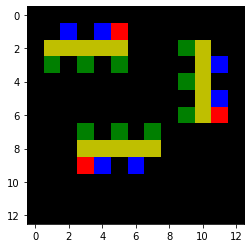

In [48]:
final_grid = solve_36d67576(train_input[0])

# check the plot with imshow

plt.figure()
plt.imshow(final_grid, cmap = cmap)


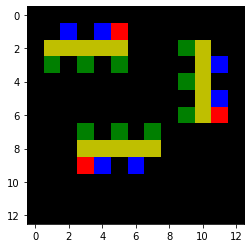

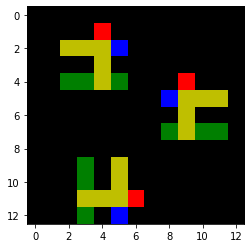

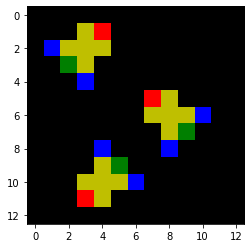

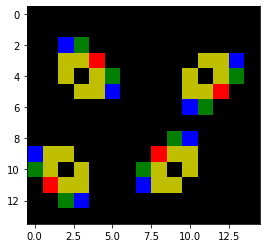

In [49]:
plot_array(train_output)

plt.figure()
plt.imshow(test_output[0], cmap = cmap)

In [52]:
# multiple line comments
# probably better
